<a href="https://colab.research.google.com/github/federico-bassi/EtricsIII/blob/main/Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Econometric III - Assignment 1 - Part 2

### **Import**

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ardl import ARDL
from google.colab import drive
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.tsa.ar_model import AutoReg
import seaborn as sns
from scipy import stats
from scipy.stats import norm

drive.mount('/content/drive')

#Load in data
data2 = pd.read_csv("/content/drive/MyDrive/EtricsIII_Ass/Data/data_assign_p2.csv")

Mounted at /content/drive


### **Point 1**

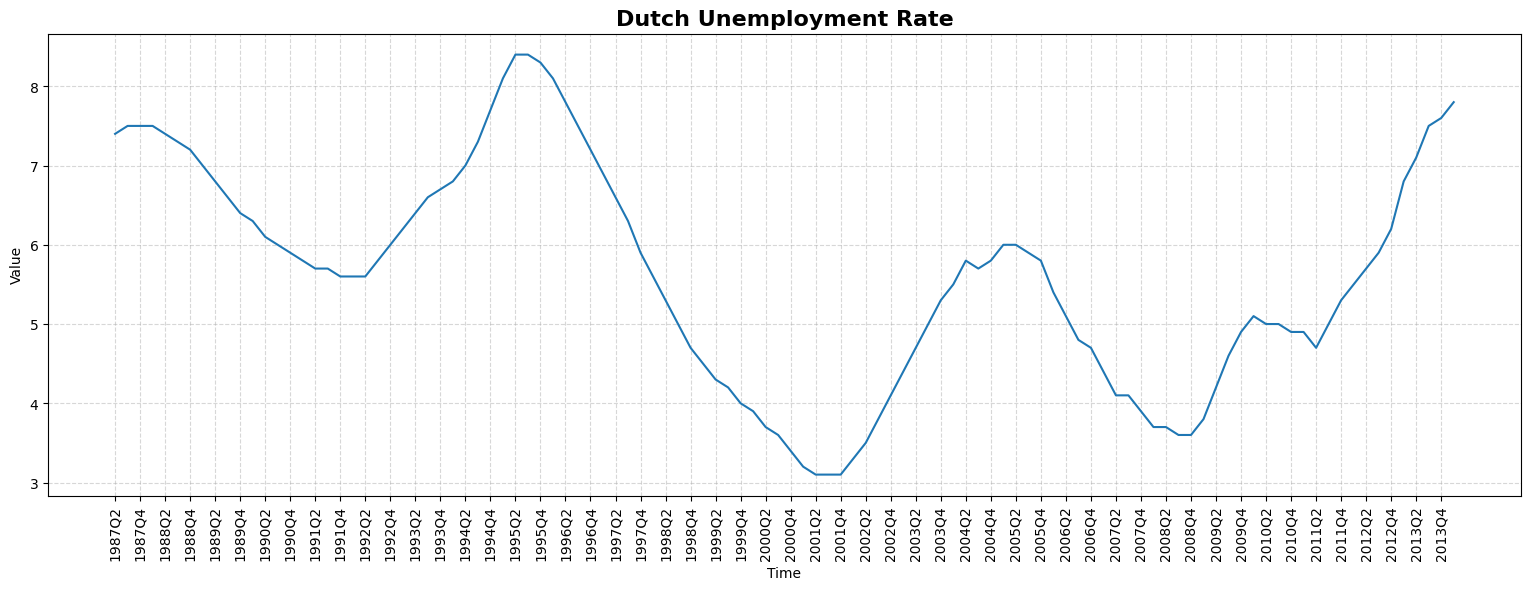

In [2]:
#Plot figure Unemployment Rate
plt.figure(figsize=(19, 6))

plt.plot(data2['obs'], data2['UN_RATE'])
plt.grid(True, linestyle='--', alpha=0.5)

#Add title and axis labels
plt.title('Dutch Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.xticks(range(0, len(data2), 2), data2['obs'].iloc[::2])
plt.savefig("/content/drive/MyDrive/EtricsIII_Ass/Figures/UN_rate.png")
plt.show()

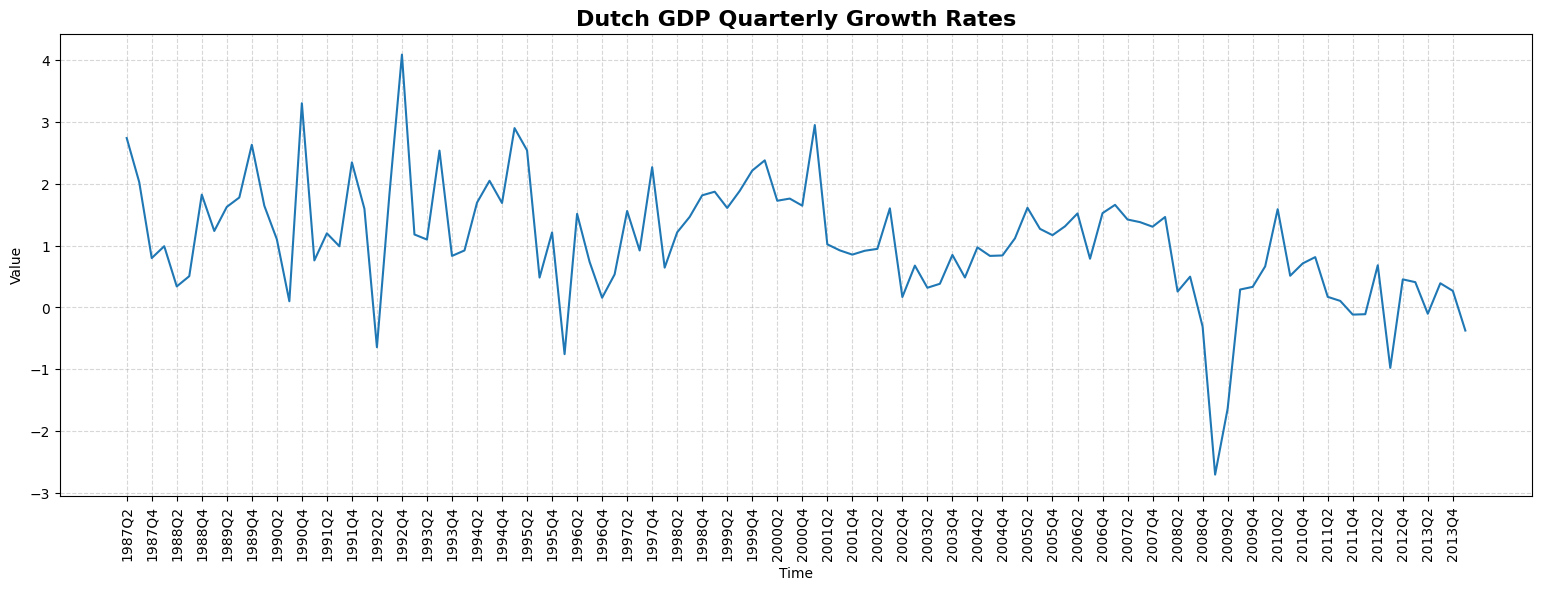

In [3]:
#Plot figure GDP Growth Rate
plt.figure(figsize=(19, 6))

plt.plot(data2['obs'], data2['GDP_QGR'])
plt.grid(True, linestyle='--', alpha=0.5)

#Add title and axis labels
plt.title('Dutch GDP Quarterly Growth Rates', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.xticks(range(0, len(data2), 2), data2['obs'].iloc[::2])
plt.savefig("/content/drive/MyDrive/EtricsIII_Ass/Figures/growth_rates2.png")
plt.show()

In [4]:
#AR(4)
ar_4_result = sm.tsa.AutoReg(data2["GDP_QGR"], 4).fit()
print(ar_4_result.summary())

                            AutoReg Model Results                             
Dep. Variable:                GDP_QGR   No. Observations:                  108
Model:                     AutoReg(4)   Log Likelihood                -130.010
Method:               Conditional MLE   S.D. of innovations              0.845
Date:                Fri, 29 Mar 2024   AIC                            272.019
Time:                        16:59:40   BIC                            287.886
Sample:                             4   HQIC                           278.447
                                  108                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3504      0.154      2.281      0.023       0.049       0.651
GDP_QGR.L1     0.3195      0.098      3.250      0.001       0.127       0.512
GDP_QGR.L2     0.0706      0.101      0.698      0.4

In [5]:
#AR(3)
ar_3_result = sm.tsa.AutoReg(data2["GDP_QGR"], 3).fit()
print(ar_3_result.summary())

                            AutoReg Model Results                             
Dep. Variable:                GDP_QGR   No. Observations:                  108
Model:                     AutoReg(3)   Log Likelihood                -130.992
Method:               Conditional MLE   S.D. of innovations              0.842
Date:                Fri, 29 Mar 2024   AIC                            271.984
Time:                        16:59:40   BIC                            285.254
Sample:                             3   HQIC                           277.361
                                  108                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3745      0.146      2.558      0.011       0.088       0.661
GDP_QGR.L1     0.3341      0.095      3.503      0.000       0.147       0.521
GDP_QGR.L2     0.0701      0.100      0.697      0.4

In [6]:
#AR(3), with second lag removed
ar_2_result = sm.tsa.AutoReg(data2["GDP_QGR"], [1,3]).fit()
print(ar_2_result.summary())

                            AutoReg Model Results                             
Dep. Variable:                GDP_QGR   No. Observations:                  108
Model:              Restr. AutoReg(3)   Log Likelihood                -131.235
Method:               Conditional MLE   S.D. of innovations              0.844
Date:                Fri, 29 Mar 2024   AIC                            270.469
Time:                        16:59:40   BIC                            281.085
Sample:                             3   HQIC                           274.771
                                  108                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4012      0.142      2.834      0.005       0.124       0.679
GDP_QGR.L1     0.3564      0.090      3.960      0.000       0.180       0.533
GDP_QGR.L3     0.2439      0.089      2.745      0.0

In [7]:
#Compute AIC for all models
aic = [ar_4_result.aic, ar_3_result.aic, ar_2_result.aic]

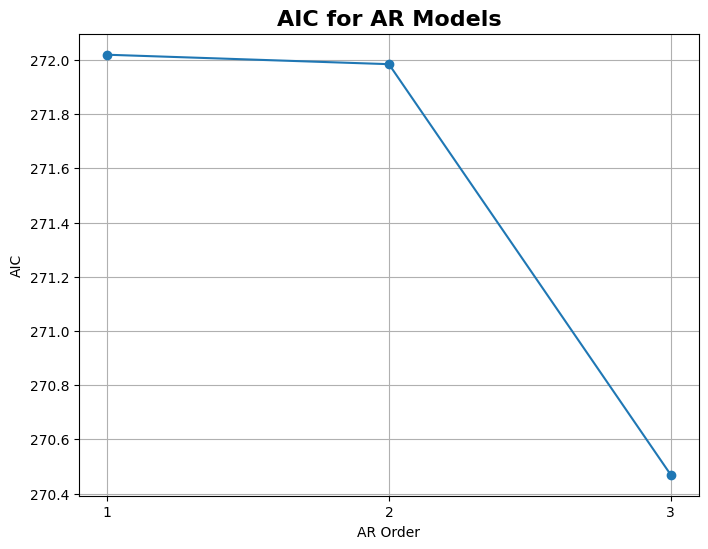

In [8]:
#Plot AIC for all AR models
num_models = len(aic)
ar_orders = range(1, num_models + 1)
plt.figure(figsize=(8, 6))
plt.plot(ar_orders, aic, marker='o', linestyle='-')
plt.title('AIC for AR Models', fontsize=16, fontweight='bold')  # Setting title properties
plt.xlabel('AR Order')
plt.ylabel('AIC')
plt.xticks(ar_orders)
plt.grid(True)
plt.savefig("/content/drive/MyDrive/EtricsIII_Ass/Figures/AIC2a")
plt.show()

In [9]:
#ADL Estimation

#We start with an ADL(4,4)
adl_44 = ARDL(endog=data2[['UN_RATE']], lags=4, exog=data2[['GDP_QGR']], order=4, trend='c')
adl_44_result = adl_44.fit()
print(adl_44_result.summary())

                              ARDL Model Results                              
Dep. Variable:                UN_RATE   No. Observations:                  108
Model:                     ARDL(4, 4)   Log Likelihood                  75.137
Method:               Conditional MLE   S.D. of innovations              0.117
Date:                Fri, 29 Mar 2024   AIC                           -128.275
Time:                        16:59:41   BIC                            -99.187
Sample:                             4   HQIC                          -116.490
                                  108                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1664      0.057      2.903      0.005       0.053       0.280
UN_RATE.L1     1.6045      0.103     15.568      0.000       1.400       1.809
UN_RATE.L2    -0.3044      0.191     -1.596      0.1

In [10]:
#ADL(4,3)
adl_43 = ARDL(endog=data2[['UN_RATE']], lags=4, exog=data2[['GDP_QGR']], order=3, trend='c')
adl_43_result = adl_43.fit()
print(adl_43_result.summary())

                              ARDL Model Results                              
Dep. Variable:                UN_RATE   No. Observations:                  108
Model:                     ARDL(4, 3)   Log Likelihood                  75.014
Method:               Conditional MLE   S.D. of innovations              0.118
Date:                Fri, 29 Mar 2024   AIC                           -130.027
Time:                        16:59:42   BIC                           -103.583
Sample:                             4   HQIC                          -119.314
                                  108                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1644      0.057      2.888      0.005       0.051       0.277
UN_RATE.L1     1.5985      0.102     15.693      0.000       1.396       1.801
UN_RATE.L2    -0.2930      0.188     -1.554      0.1

In [11]:
#ADL(4,3), without the second AR lag
adl_43w2 =  ARDL(endog=data2[['UN_RATE']], lags=4, exog=data2[['GDP_QGR']], order=[0,1,3], trend='c')
adl_43w2_result = adl_43w2.fit()
print(adl_43w2_result.summary())

                              ARDL Model Results                              
Dep. Variable:                UN_RATE   No. Observations:                  108
Model:                     ARDL(4, 3)   Log Likelihood                  74.826
Method:               Conditional MLE   S.D. of innovations              0.118
Date:                Fri, 29 Mar 2024   AIC                           -131.653
Time:                        16:59:42   BIC                           -107.853
Sample:                             4   HQIC                          -122.011
                                  108                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1600      0.056      2.845      0.005       0.048       0.272
UN_RATE.L1     1.6073      0.100     16.009      0.000       1.408       1.807
UN_RATE.L2    -0.3019      0.187     -1.613      0.1

In [12]:
#ADL(4,3), without the nullth and second AR lag
adl_43w02 =  ARDL(endog=data2[['UN_RATE']], lags=4, exog=data2[['GDP_QGR']], order=[1,3], trend='c')
adl_43w02_result = adl_43w02.fit()
print(adl_43w02_result.summary())

                              ARDL Model Results                              
Dep. Variable:                UN_RATE   No. Observations:                  108
Model:                     ARDL(4, 3)   Log Likelihood                  74.288
Method:               Conditional MLE   S.D. of innovations              0.118
Date:                Fri, 29 Mar 2024   AIC                           -132.577
Time:                        16:59:42   BIC                           -111.422
Sample:                             4   HQIC                          -124.006
                                  108                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1621      0.056      2.884      0.005       0.051       0.274
UN_RATE.L1     1.5992      0.100     15.980      0.000       1.401       1.798
UN_RATE.L2    -0.3016      0.187     -1.611      0.1

In [13]:
#ADL(3,3), without the nullth and second AR lag
adl_33w402 =  ARDL(endog=data2[['UN_RATE']], lags=3, exog=data2[['GDP_QGR']], order=[1,3], trend='c')
adl_33w402_result = adl_33w402.fit()
print(adl_33w402_result.summary())

                              ARDL Model Results                              
Dep. Variable:                UN_RATE   No. Observations:                  108
Model:                     ARDL(3, 3)   Log Likelihood                  75.096
Method:               Conditional MLE   S.D. of innovations              0.118
Date:                Fri, 29 Mar 2024   AIC                           -136.193
Time:                        16:59:42   BIC                           -117.615
Sample:                             3   HQIC                          -128.665
                                  108                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1765      0.053      3.330      0.001       0.071       0.282
UN_RATE.L1     1.5784      0.097     16.350      0.000       1.387       1.770
UN_RATE.L2    -0.3377      0.181     -1.864      0.0

In [14]:
#ADL(3,1), without the nullth AR lag
adl_31w40 =  ARDL(endog=data2[['UN_RATE']], lags=3, exog=data2[['GDP_QGR']], order=[1], trend='c')
adl_31w40_result = adl_31w40.fit()
print(adl_31w40_result.summary())

                              ARDL Model Results                              
Dep. Variable:                UN_RATE   No. Observations:                  108
Model:                     ARDL(3, 1)   Log Likelihood                  74.666
Method:               Conditional MLE   S.D. of innovations              0.119
Date:                Fri, 29 Mar 2024   AIC                           -137.331
Time:                        16:59:42   BIC                           -121.407
Sample:                             3   HQIC                          -130.878
                                  108                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1848      0.052      3.544      0.001       0.081       0.288
UN_RATE.L1     1.5723      0.096     16.342      0.000       1.381       1.763
UN_RATE.L2    -0.3398      0.181     -1.877      0.0

In [15]:
#ADL(3,1), without the second ADL and nullth AR lag
adl_31w240 =  ARDL(endog=data2[['UN_RATE']], lags=[1,3], exog=data2[['GDP_QGR']], order=[1], trend='c')
adl_31w240_result = adl_31w240.fit()
print(adl_31w240_result.summary())

                              ARDL Model Results                              
Dep. Variable:                UN_RATE   No. Observations:                  108
Model:                     ARDL(3, 1)   Log Likelihood                  72.848
Method:               Conditional MLE   S.D. of innovations              0.121
Date:                Fri, 29 Mar 2024   AIC                           -135.696
Time:                        16:59:42   BIC                           -122.426
Sample:                             3   HQIC                          -130.319
                                  108                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2076      0.051      4.043      0.000       0.106       0.309
UN_RATE.L1     1.3997      0.029     48.711      0.000       1.343       1.457
UN_RATE.L3    -0.4316      0.029    -14.879      0.0

In [16]:
#Export the results for AR on Latex
res_ar = summary_col([ar_2_result],stars=True,float_format='%0.2f')
f = open('/content/drive/MyDrive/EtricsIII_Ass/Tables/PART2_ar_estimation.tex', 'w')
f.write(res_ar.as_latex())
f.close()

In [17]:
#Export the results for ADL on Latex
res_adl = summary_col([adl_31w240_result],stars=True,float_format='%0.2f')
f = open('/content/drive/MyDrive/EtricsIII_Ass/Tables/PART2_adl_estimation.tex', 'w')
f.write(res_adl.as_latex())
f.close()

### **Point 4**

In [18]:
#View coefficients ADL model
adl_31w240_result.params

const         0.207594
UN_RATE.L1    1.399745
UN_RATE.L3   -0.431554
GDP_QGR.L1   -0.027101
dtype: float64

In [19]:
#Find sigma^2, and coefficients ADL model
sigma = np.std(adl_31w240_result.resid)
alpha = adl_31w240_result.params["const"]
phi_1 = adl_31w240_result.params["UN_RATE.L1"]
phi_3 = adl_31w240_result.params["UN_RATE.L3"]
beta_1 = adl_31w240_result.params["GDP_QGR.L1"]

In [20]:
X_t_1 = data2.loc[data2["obs"]=="2014Q1"]["GDP_QGR"].values[0]
Y_t_1 = data2.loc[data2["obs"]=="2014Q1"]["UN_RATE"].values[0]
Y_t_3 = data2.loc[data2["obs"]=="2013Q3"]["UN_RATE"].values[0]

In [21]:
1-norm.cdf((7.8-alpha-phi_1*Y_t_1-phi_3*Y_t_3-beta_1*X_t_1)/sigma)

0.7937752553750599

### **Point 5 - Forecasts**

In [22]:
#Forecasts next 8 quarters of GDP growth using AR-model, using package
ar_2_result.predict(start=108, end=108+7)

108    0.363049
109    0.595891
110    0.522319
111    0.675923
112    0.787453
113    0.809267
114    0.854499
115    0.897818
dtype: float64

In [23]:
#Store all observed GDP observations in list
GDP_predicted = data2["GDP_QGR"].values
print(GDP_predicted)
GDP_predicted_list = GDP_predicted.tolist()

[ 2.74048163  2.02753555  0.79837163  0.99036134  0.33964085  0.50526176
  1.82477195  1.23696683  1.62639963  1.77828337  2.63210332  1.6449867
  1.10276388  0.09983952  3.30377182  0.76043966  1.19886255  0.98973206
  2.34759764  1.5963413  -0.64396969  1.83058678  4.09078644  1.18014803
  1.09805367  2.53741393  0.83318935  0.9216578   1.69471568  2.04939314
  1.68972046  2.90149038  2.54170397  0.48299768  1.21335199 -0.75621738
  1.51416562  0.73670015  0.15667935  0.5346634   1.56006736  0.92091738
  2.26876988  0.6437373   1.21480319  1.46533727  1.81382933  1.87232747
  1.60916339  1.88552822  2.21403158  2.37937511  1.72603534  1.76103159
  1.64611958  2.95093591  1.02131215  0.92286571  0.85432298  0.91697579
  0.94709926  1.60319936  0.16838024  0.67651764  0.31818851  0.38250395
  0.84951087  0.48387826  0.9715068   0.83364233  0.84058958  1.1177833
  1.61214575  1.27098303  1.1689631   1.312198    1.5205637   0.78792144
  1.52538849  1.65954814  1.42227751  1.37970911  1.3

In [24]:
#Store coefficients AR model
phi1 = ar_2_result.params["GDP_QGR.L1"]
phi3 = ar_2_result.params["GDP_QGR.L3"]
alpha = ar_2_result.params["const"]

#Manually compute forecasts next 8 quarters of GDP growth based on AR model
k_values = range(1, 9)
for k in k_values:
    expectation = alpha + phi1*GDP_predicted_list[107+k-1]+ phi3*GDP_predicted_list[107+k-3]
    GDP_predicted_list.append(expectation)


In [25]:
last_8_observations = GDP_predicted_list[-8:]
print(last_8_observations)

# Print dataframe to latex
time_periods = ["2014Q2", "2014Q3", "2014Q4", "2015Q1", "2015Q2", "2015Q3", "2015Q4", "2016Q1"]
d={"obs": time_periods, "GDP_QGR": last_8_observations}
df = pd.DataFrame(data=d)
print(df)
df.to_latex("/content/drive/MyDrive/EconometricsIII/predictions2d.tex", index=False)

[0.3630489760308302, 0.5958905810500094, 0.522319031910921, 0.6759230047093756, 0.7874529845336403, 0.809266889572902, 0.8544987576638758, 0.8978180911167368]
      obs   GDP_QGR
0  2014Q2  0.363049
1  2014Q3  0.595891
2  2014Q4  0.522319
3  2015Q1  0.675923
4  2015Q2  0.787453
5  2015Q3  0.809267
6  2015Q4  0.854499
7  2016Q1  0.897818


<ipython-input-25-e420fef55165>:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("/content/drive/MyDrive/EconometricsIII/predictions2d.tex", index=False)


OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/EconometricsIII'

In [ ]:
#Store coefficients ADL model
params_31w240 = adl_31w240_result.params

In [ ]:
#Now we are going to forecast the UR (Unemployment Rate) values for the next 8 periods
#Store coefficients ADL model
phi11 = params_31w240["UN_RATE.L1"]
phi33 = params_31w240["UN_RATE.L3"]
beta1 = params_31w240["GDP_QGR.L1"]
alpha1 = params_31w240["const"]

In [ ]:
#Store UR observations in list
UR_predicted = data2["UN_RATE"].values
print(UR_predicted)
UR_predicted_list = UR_predicted.tolist()
#Create empty vector for predictions
forecasted_UN = []


In [ ]:
#Manually create forecasts
k_values = range(1, 9)
for k in k_values:
    forecasted = alpha1 + phi11*UR_predicted_list[107+k-1]+ phi33*UR_predicted_list[107+k-3] + beta1*GDP_predicted_list[107+k-1]
    UR_predicted_list.append(forecasted)
    forecasted_UN.append(forecasted)


In [ ]:
#View forecasted values of UR
forecasted_UN

In [ ]:
#Print dataframe to latex
time_periods = ["2014Q2", "2014Q3", "2014Q4", "2015Q1", "2015Q2", "2015Q3", "2015Q4", "2016Q1"]
d={"obs": time_periods, "UN_RATE": forecasted_UN}
df = pd.DataFrame(data=d)
print(df)
df.to_latex("/content/drive/MyDrive/EconometricsIII/predictions2dADL.tex", index=False)

### **Point 6 - IRF**


In [ ]:
ar_2_result.params

In [ ]:
gamma_1 = ar_2_result.params["GDP_QGR.L1"]
gamma_3 = ar_2_result.params["GDP_QGR.L3"]

In [ ]:
eps = -2

In [ ]:
x_origin = -0.37
y_origin = 7.8

In [ ]:
x_sm3 = x_origin
x_sm2 = x_origin
x_sm1 = x_origin
x_s = x_origin + eps
x_sp1 = x_origin + gamma_1*eps
x_sp2 = x_origin + gamma_1**2*eps
x_sp3 = x_origin + (gamma_1**3+gamma_3)*eps

x_irf = [x_sm3, x_sm2, x_sm1, x_s, x_sp1, x_sp2, x_sp3]

In [ ]:
y_sm3 = y_origin
y_sm2 = y_origin
y_sm1 = y_origin
y_s = y_origin
y_sp1 = y_origin + beta_1*eps
y_sp2 = y_origin + (phi_1*beta_1+beta_1*gamma_1)*eps
y_sp3 = y_origin + (phi_1**2*beta_1+phi_1*beta_1*gamma_1+beta_1*gamma_1**2)*eps

y_irf = [y_sm3, y_sm2, y_sm1, y_s, y_sp1, y_sp2, y_sp3]

In [ ]:
time = ["s" + ("-" if i < 0 else "+") + str(abs(i)) for i in range(-3, 4)]

In [ ]:
df_x = pd.DataFrame({"time":time, "impulse_response": x_irf})
df_y = pd.DataFrame({"time":time, "impulse_response": y_irf})

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,8))
ax1.plot(df_x["time"], df_x["impulse_response"], marker='o')
ax1.set_title("GDP growth")

ax2.plot(df_y["time"], df_y["impulse_response"], marker='o')
ax2.set_title("Unemployment")

fig.suptitle("IRF - Negative shock", fontsize=16)
plt.savefig("/content/drive/MyDrive/EtricsIII_Ass/Figures/irf_positive.png")
plt.show()
